In [20]:
# Код, который вы представили, создает календарные признаки на основе столбца "datetime". Он уже хорошо начинает учитывать календарные данные, но давайте добавим некоторые дополнительные признаки и сделаем некоторые улучшения:
# Праздники и выходные дни: Для учета праздников и выходных дней в Италии вы можете иметь дополнительный столбец, указывающий, является ли текущая дата праздником или выходным днем.

# Лаги: Добавим лаги для переменной "variable", чтобы модель могла учитывать предыдущие значения признака.

# Удаление лишних столбцов: После создания всех необходимых признаков уберем столбцы, которые больше не нужны.



import pandas as pd
import numpy as np
import holidays

# Create a datetime range from "2016-01-01 00:00:00" to "2023-12-31 23:00:00" by hour
date_rng = pd.date_range(start="2016-01-01 00:00:00", end="2023-12-31 23:00:00", freq="H")

# Create a DataFrame with the datetime column and a variable column with random values
df = pd.DataFrame({'datetime': date_rng, 'variable': np.random.randn(len(date_rng))})

# Get Italian holidays
it_holidays = holidays.Italy(years=[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

# Add a new column for Italian holidays and weekends
df['is_italian_holiday'] = df['datetime'].dt.date.isin(it_holidays)
df['is_weekend'] = df['datetime'].dt.weekday.isin([5, 6])

# Add time-based features BEFORE dropping the 'datetime' column
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

# Add cyclical features for hourly, daily, and yearly cycles
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Now it is safe to drop the original 'datetime' column
df.drop(columns=['datetime'], inplace=True)

# Display the resulting DataFrame
print(df.head())



   variable  is_italian_holiday  is_weekend  hour  day_of_week  month  \
0  0.988495                True       False     0            4      1   
1 -1.231282                True       False     1            4      1   
2  0.317162                True       False     2            4      1   
3 -0.501072                True       False     3            4      1   
4 -0.458985                True       False     4            4      1   

   hour_sin  hour_cos  day_of_week_sin  day_of_week_cos  month_sin  month_cos  
0  0.000000  1.000000        -0.433884        -0.900969        0.5   0.866025  
1  0.258819  0.965926        -0.433884        -0.900969        0.5   0.866025  
2  0.500000  0.866025        -0.433884        -0.900969        0.5   0.866025  
3  0.707107  0.707107        -0.433884        -0.900969        0.5   0.866025  
4  0.866025  0.500000        -0.433884        -0.900969        0.5   0.866025  


DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2024-12-31 14:00:00', '2024-12-31 15:00:00',
               '2024-12-31 16:00:00', '2024-12-31 17:00:00',
               '2024-12-31 18:00:00', '2024-12-31 19:00:00',
               '2024-12-31 20:00:00', '2024-12-31 21:00:00',
               '2024-12-31 22:00:00', '2024-12-31 23:00:00'],
              dtype='datetime64[ns]', length=78912, freq='H')
Date: 2020-02-19 19:00:00, Day of Week (DataFrame): 2, Day of Week (Calendar): Ellipsis
Date: 2019-10-16 19:00:00, Day of Week (DataFrame): 2, Day of Week (Calendar): Ellipsis
Date: 2020-05-04 22:00:00, Day of Week (DataFrame): 0, Day of Week (Calendar): Ellipsis
Date: 2022-06-14 04:00:00, Day of Week (Data

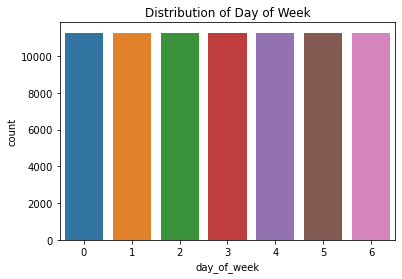

Number of NaN/Null values in 'day_of_week': 0
   variable  is_italian_holiday  is_weekend  hour  day_of_week  month  \
0  1.210845                True       False     0            4      1   
1  0.483788                True       False     1            4      1   
2  0.172945                True       False     2            4      1   
3 -1.885223                True       False     3            4      1   
4  0.388371                True       False     4            4      1   

   hour_sin  hour_cos  day_of_week_sin  day_of_week_cos  month_sin  month_cos  \
0  0.000000  1.000000        -0.433884        -0.900969        0.5   0.866025   
1  0.258819  0.965926        -0.433884        -0.900969        0.5   0.866025   
2  0.500000  0.866025        -0.433884        -0.900969        0.5   0.866025   
3  0.707107  0.707107        -0.433884        -0.900969        0.5   0.866025   
4  0.866025  0.500000        -0.433884        -0.900969        0.5   0.866025   

   variable_lag_1  variable_

In [22]:
import pandas as pd
import numpy as np
import holidays
import seaborn as sns
import matplotlib.pyplot as plt


def create_cyclical_features(df, column, period):
    df[f'{column}_sin'] = np.sin(2 * np.pi * df[column] / period)
    df[f'{column}_cos'] = np.cos(2 * np.pi * df[column] / period)
    return df

def add_lag_features(df, column, lags):
    for i in range(1, lags + 1):
        df[f'{column}_lag_{i}'] = df[column].shift(i)
    return df

# Create a datetime range from "2016-01-01 00:00:00" to "2023-12-31 23:00:00" by hour
date_rng = pd.date_range(start="2016-01-01 00:00:00", end="2024-12-31 23:00:00", freq="H")
print(date_rng)
# Create a DataFrame with the datetime column and a variable column with random values
df = pd.DataFrame({'datetime': date_rng, 'variable': np.random.randn(len(date_rng))})

# Get Italian holidays for years in date_rng
years = np.arange(date_rng.year.min(), date_rng.year.max() + 1)
it_holidays = holidays.Italy(years=np.arange(2016, 2025))

# Add a new column for Italian holidays and weekends
df['is_italian_holiday'] = df['datetime'].dt.date.isin(it_holidays)
df['is_weekend'] = df['datetime'].dt.weekday.isin([5, 6])

# Add time-based features BEFORE dropping the 'datetime' column
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

# Add cyclical features
df = create_cyclical_features(df, 'hour', 24)
df = create_cyclical_features(df, 'day_of_week', 7)
df = create_cyclical_features(df, 'month', 12)

# Add lag features
df = add_lag_features(df, 'variable', lags=3)
# Сохраняем день недели и время перед удалением 'datetime'
sample_dates = df[['datetime', 'day_of_week']].sample(7, random_state=1)


# Now it is safe to drop the original 'datetime' column
df.drop(columns=['datetime'], inplace=True)

# 1. Проверка соответствия календарю
for _, row in sample_dates.iterrows():
    date = row['datetime']
    print(f"Date: {date}, Day of Week (DataFrame): {row['day_of_week']}, Day of Week (Calendar): {...}")  # Проверьте день недели в календаре и вставьте его вместо "..."

# 2. Визуализация
sns.countplot(x='day_of_week', data=df)
plt.title('Distribution of Day of Week')
plt.show()

# 3. Проверка на NaN/Null
print(f"Number of NaN/Null values in 'day_of_week': {df['day_of_week'].isna().sum()}")
# Display the resulting DataFrame
print(df.head())

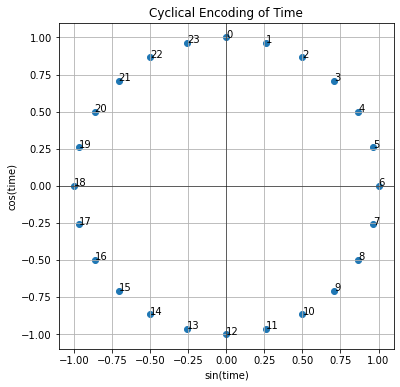

In [21]:
# Циклические признаки. Визуализация

import matplotlib.pyplot as plt
import numpy as np

# Генерируем 24 точки, представляющие каждый час в сутках
hours = np.linspace(0, 23, 24)

# Преобразуем часы в радианы, чтобы использовать синус и косинус
radians = 2 * np.pi * hours / 24

# Применяем синус и косинус
sin_time = np.sin(radians)
cos_time = np.cos(radians)

# Создаем scatter plot
plt.figure(figsize=(6,6))
plt.scatter(sin_time, cos_time)
plt.xlabel('sin(time)')
plt.ylabel('cos(time)')
plt.title('Cyclical Encoding of Time')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Наносим метки часов
for i, hour in enumerate(hours.astype(int)):
    plt.annotate(str(hour), (sin_time[i], cos_time[i]))

plt.show()
